In [104]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import numpy as np
import os
import importlib
import seaborn as sns
from scipy.signal import find_peaks

In [105]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.ace.data_utilities as ace_utils
importlib.reload(ace_utils)
print("Finish importing scripts.")

Finish importing scripts.


In [106]:
sns.set(font_scale=2)
sns.set_style("white")

# Loading, Processing, and Extracting XS Data from ACE

In [107]:
nsx, jxs, xss = ace_utils.get_nxs_jxs_xss("92233", temp="03c")

In [108]:
pointers = ace_utils.get_pointers(nsx, jxs)

In [109]:
energies = ace_utils.get_energy_array(xss, pointers)

In [110]:
mt_array = ace_utils.get_mt_array(xss, pointers)

In [111]:
mt_xs_pointers_array = ace_utils.get_mt_xs_pointers_array(xss, pointers) # lsig

In [112]:
mt_data = ace_utils.get_basic_mts(xss, pointers)

# Adjusting High and Low Energy Cross Section Areas

In [113]:
# u233_dt_test = pd.read_csv("u233_knn_train.csv")
# u233_dt_test["Energy"] = u233_dt_test["Energy"] / 1E6

u233_dt_test = pd.read_csv("acedata_ml/U233/DT_B0/DT100_MSS15_MSL7_standard_one_hot_B0_v5/ml_xs.csv")

# u233_dt_test = pd.read_csv("acedata_ml/U233/KNN_B0/k10_distance_euclidean_robust_one_hot_B0_v4/ml_xs.csv")


u233_dt_test["Energy"] = u233_dt_test["Energy"] / 1E6

In [114]:
mt18_info = ace_utils.get_xs_for_mt(18, mt_array, mt_xs_pointers_array, jxs, xss, pointers)
mt102_info = ace_utils.get_xs_for_mt(102, mt_array, mt_xs_pointers_array, jxs, xss, pointers)
mt4_info = ace_utils.get_xs_for_mt(4, mt_array, mt_xs_pointers_array, jxs, xss, pointers)
mt51_info = ace_utils.get_xs_for_mt(51, mt_array, mt_xs_pointers_array, jxs, xss, pointers)

INFO:root:8742 Energy and 8742 Cross Section Points Avaliable for MT18.
INFO:root:8742 Energy and 8742 Cross Section Points Avaliable for MT102.
INFO:root:364 Energy and 364 Cross Section Points Avaliable for MT4.
INFO:root:364 Energy and 364 Cross Section Points Avaliable for MT51.


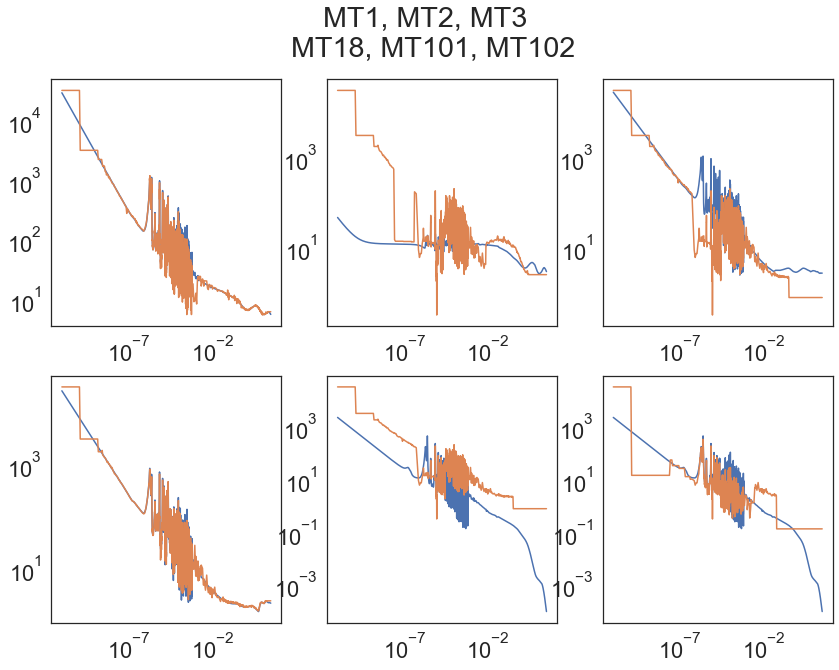

In [115]:
fig, axs = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('MT1, MT2, MT3 \n MT18, MT101, MT102')
axs[0, 0].loglog(energies, mt_data["MT_1"])
axs[0, 1].loglog(energies, mt_data["MT_2"])
axs[0, 2].loglog(energies, mt_data["MT_3"])
axs[1, 0].loglog(mt18_info["energy"], mt18_info["xs"])
axs[1, 1].loglog(energies, mt_data["MT_101"])
axs[1, 2].loglog(mt102_info["energy"], mt102_info["xs"])

axs[0, 0].loglog(u233_dt_test.Energy, u233_dt_test.MT_1)
axs[0, 1].loglog(u233_dt_test.Energy, u233_dt_test.MT_2)
axs[0, 2].loglog(u233_dt_test.Energy, u233_dt_test.MT_3)
axs[1, 0].loglog(u233_dt_test.Energy, u233_dt_test.MT_18)
axs[1, 1].loglog(u233_dt_test.Energy, u233_dt_test.MT_101)
axs[1, 2].loglog(u233_dt_test.Energy, u233_dt_test.MT_102)

In [94]:
# peaks, properties = find_peaks(mt_data["MT_1"], prominence=1, width=5)
# properties["prominences"], properties["widths"]

# plt.loglog(mt_data["MT_1"])
# plt.loglog(peaks, mt_data["MT_1"][peaks], "x")
# plt.show()

# mt1_1v_endf = mt_data["MT_1"][:peaks[0]]

# u233_dt_test.MT_1 = np.concatenate((mt1_1v_endf, u233_dt_test.MT_1[peaks[0]:].values), axis=0)

# plt.loglog(energies, np.concatenate((mt1_1v_endf, u233_dt_test.MT_1[peaks[0]:].values), axis=0))

# 1- .get_corrected_ml_xs(): Smoothing 1/v Region

In [95]:
u233_dt_test_mod = ace_utils.get_hybrid_ml_xs(u233_dt_test.copy(), mt_data, mt_array, mt_xs_pointers_array, pointers, jxs, xss)

INFO:root:8742 Energy and 8742 Cross Section Points Avaliable for MT102.
INFO:root:8742 Energy and 8742 Cross Section Points Avaliable for MT18.
INFO:root:364 Energy and 364 Cross Section Points Avaliable for MT4.
INFO:root:364 Energy and 364 Cross Section Points Avaliable for MT51.


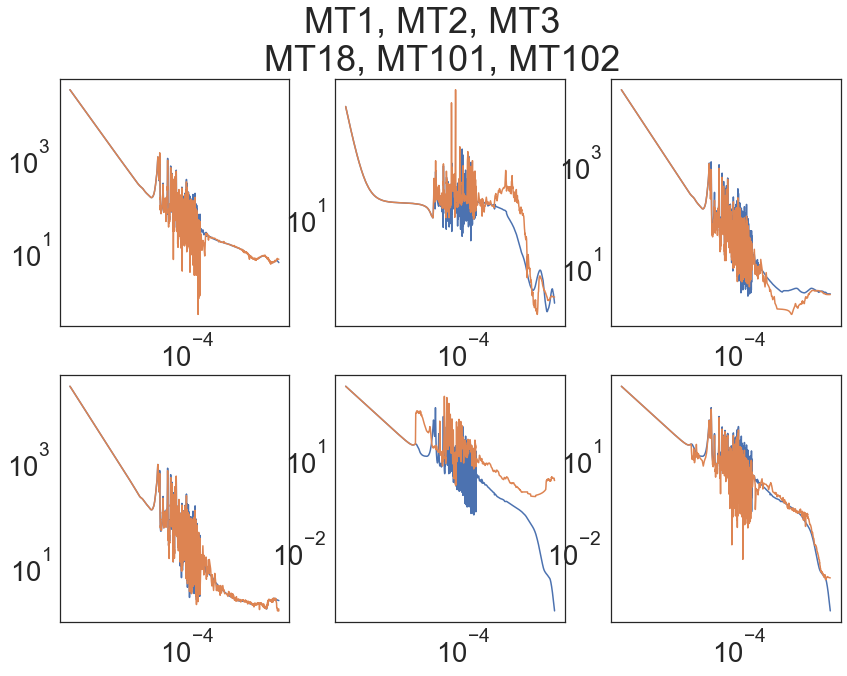

In [96]:
fig, axs = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('MT1, MT2, MT3 \n MT18, MT101, MT102')
axs[0, 0].loglog(energies, mt_data["MT_1"])
axs[0, 1].loglog(energies, mt_data["MT_2"])
axs[0, 2].loglog(energies, mt_data["MT_3"])
axs[1, 0].loglog(mt18_info["energy"], mt18_info["xs"])
axs[1, 1].loglog(energies, mt_data["MT_101"])
axs[1, 2].loglog(mt102_info["energy"], mt102_info["xs"])

axs[0, 0].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_1)
axs[0, 1].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_2)
axs[0, 2].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_3)
axs[1, 0].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_18)
axs[1, 1].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_101)
axs[1, 2].loglog(u233_dt_test.Energy, u233_dt_test_mod.MT_102)

# 2. get_final_ml_ace_df() Adjusts MT2 to conserve Unitarity

### Creating Energy Grid DataFrame and Creating MT101 and  MT3 Data

In [97]:
Energy_Grid = ace_utils.get_final_ml_ace_df(
    energies, mt_array, mt_xs_pointers_array, pointers, jxs, xss, u233_dt_test_mod.copy())

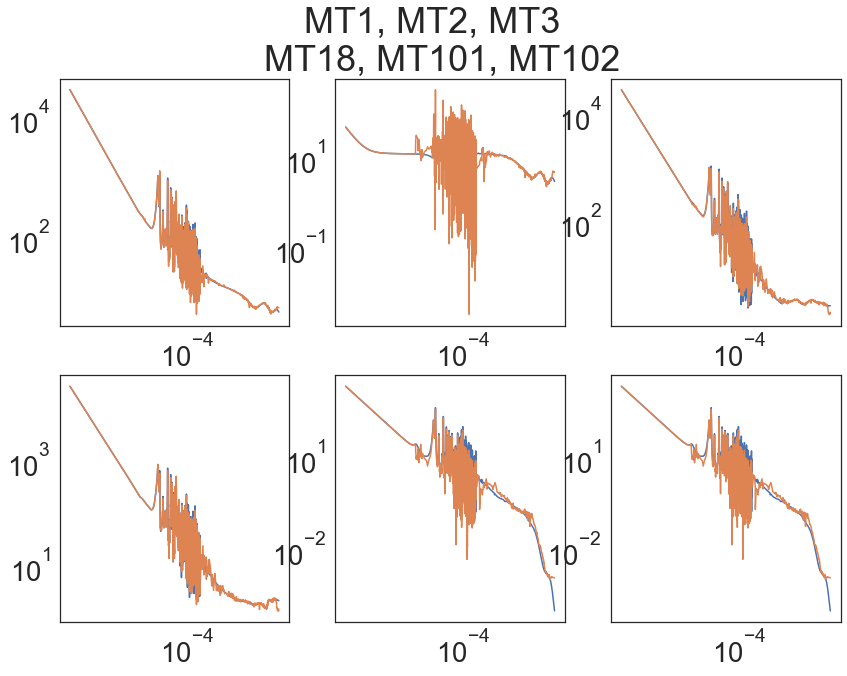

In [98]:
fig, axs = plt.subplots(2, 3, figsize=(14,10))
fig.suptitle('MT1, MT2, MT3 \n MT18, MT101, MT102')
axs[0, 0].loglog(energies, mt_data["MT_1"])
axs[0, 1].loglog(energies, mt_data["MT_2"])
axs[0, 2].loglog(energies, mt_data["MT_3"])
axs[1, 0].loglog(mt18_info["energy"], mt18_info["xs"])
axs[1, 1].loglog(energies, mt_data["MT_101"])
axs[1, 2].loglog(mt102_info["energy"], mt102_info["xs"])

axs[0, 0].loglog(u233_dt_test.Energy, Energy_Grid.MT_1)
axs[0, 1].loglog(u233_dt_test.Energy, Energy_Grid.MT_2)
axs[0, 2].loglog(u233_dt_test.Energy, Energy_Grid.MT_3)
axs[1, 0].loglog(u233_dt_test.Energy, Energy_Grid.MT_18)
axs[1, 1].loglog(u233_dt_test.Energy, Energy_Grid.MT_101)
axs[1, 2].loglog(u233_dt_test.Energy, Energy_Grid.MT_102)

In [99]:
diff_sig_1 = mt_data["MT_1"] - Energy_Grid.MT_1.values
absolute_diff_sig_1 = np.absolute(diff_sig_1)

diff_sig_18 = mt18_info["xs"] - Energy_Grid.MT_18.values
absolute_diff_sig_18 = np.absolute(diff_sig_18)

diff_sig_102 = mt102_info["xs"] - Energy_Grid.MT_102.values
absolute_diff_sig_102 = np.absolute(diff_sig_102)

In [100]:
sns.set(font_scale=2)
sns.set_style("white")

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later


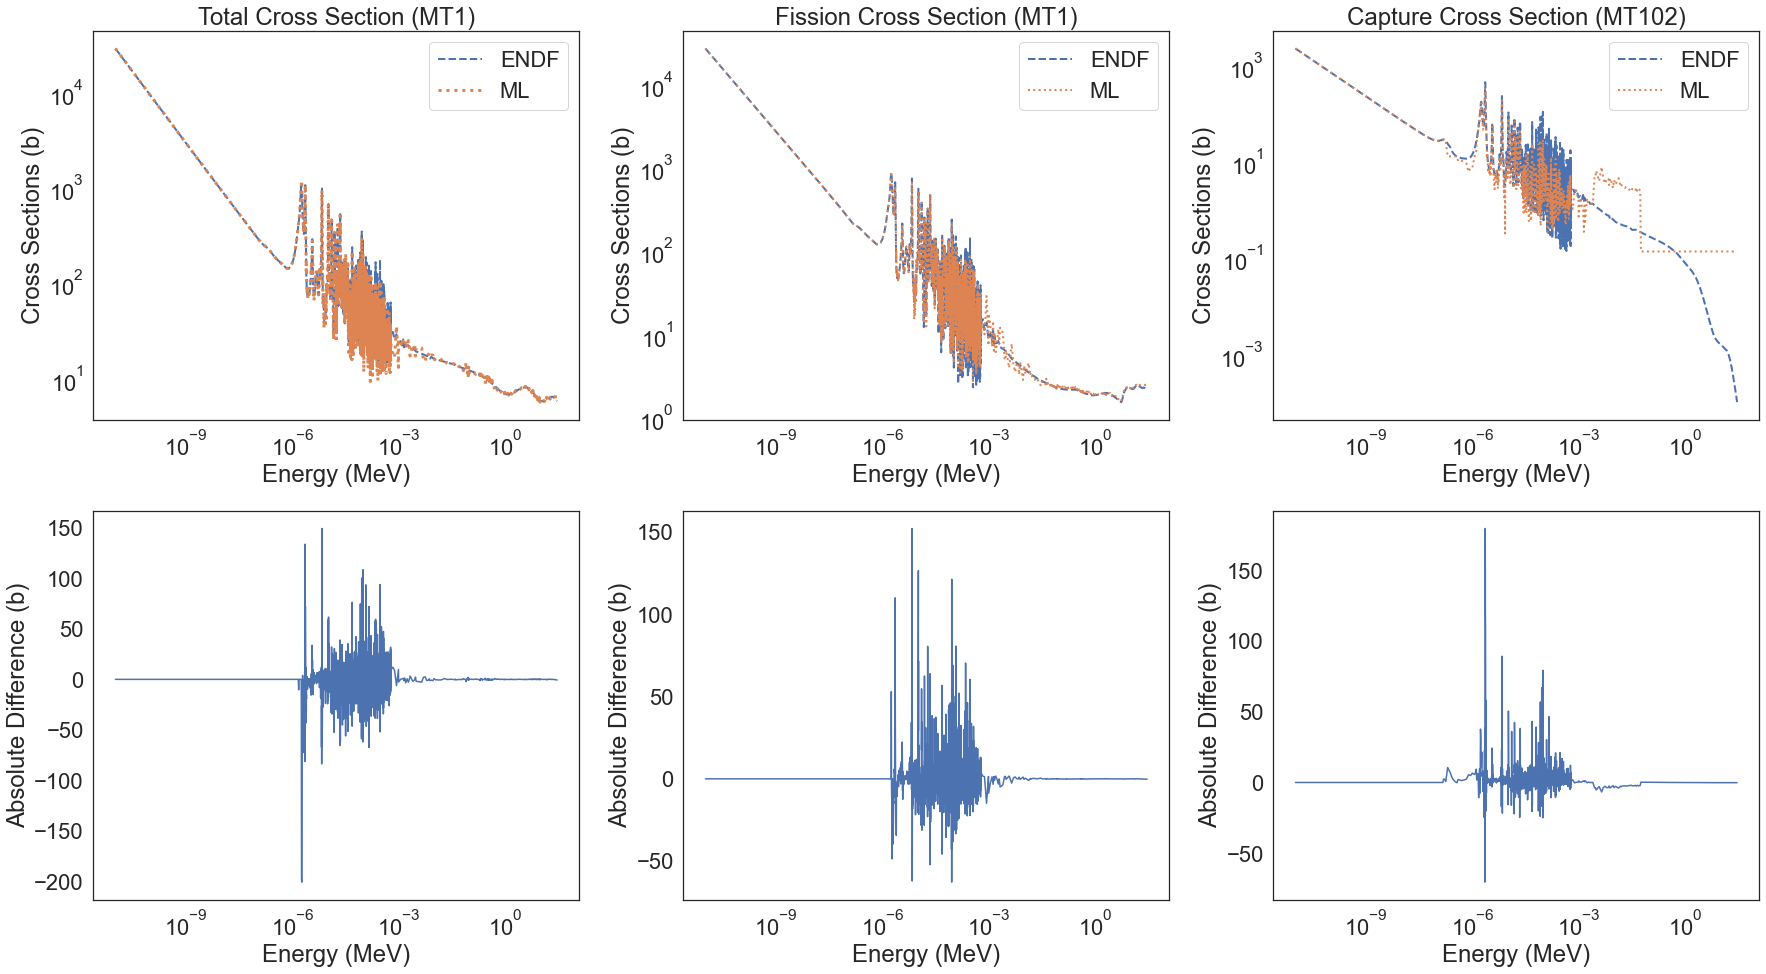

In [84]:
fig, axs = plt.subplots(2, 3, figsize=(25,14))

axs[0, 0].loglog(energies, mt_data["MT_1"], linestyle='dashed', label='ENDF', linewidth=2)
axs[0, 0].loglog(u233_dt_test.Energy, Energy_Grid.MT_1, linestyle='dotted', label='ML', linewidth=3)
axs[0, 0].set_ylabel("Cross Sections (b)")
axs[0, 0].set_xlabel("Energy (MeV)")
axs[1, 0].plot(energies, diff_sig_1)
axs[1, 0].set_xscale('log')
axs[1, 0].set_ylabel('Absolute Difference (b)')
axs[1, 0].set_xlabel("Energy (MeV)")
axs[0, 0].set_title('Total Cross Section (MT1)')

# axs[0, 0].loglog(energies, Energy_Grid.MT_18, linestyle="dotted", linewidth=5, label="ML")
# axs[0, 0].loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
# axs[0, 0].set_title("MT 18")
axs[0, 0].legend()

axs[0, 1].loglog(mt18_info["energy"], mt18_info["xs"], linestyle='dashed', label='ENDF', linewidth=2)
axs[0, 1].loglog(u233_dt_test.Energy, Energy_Grid.MT_18, linestyle='dotted', label='ML', linewidth=2)
axs[0, 1].set_ylabel("Cross Sections (b)")
axs[0, 1].set_xlabel("Energy (MeV)")
axs[1, 1].plot(energies, diff_sig_18)
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylabel('Absolute Difference (b)')
axs[1, 1].set_xlabel("Energy (MeV)")
axs[0, 1].set_title('Fission Cross Section (MT1)')
axs[0, 1].legend()


axs[0, 2].loglog(mt102_info["energy"], mt102_info["xs"], linestyle='dashed', label='ENDF', linewidth=2)
axs[0, 2].loglog(u233_dt_test.Energy, Energy_Grid.MT_102, linestyle='dotted', label='ML', linewidth=2)
axs[0, 2].set_ylabel("Cross Sections (b)")
axs[0, 2].set_xlabel("Energy (MeV)")
axs[1, 2].plot(energies, diff_sig_102)
axs[1, 2].set_xscale('log')
axs[1, 2].set_ylabel('Absolute Difference (b)')
axs[1, 2].set_xlabel("Energy (MeV)")
axs[0, 2].set_title('Capture Cross Section (MT102)')
axs[0, 2].legend()

fig.tight_layout(pad=1.0)
plt.savefig("figures/mc_winter_all_mt.png", dpi=600, bbox_tight=True)

In [101]:
sns.set(font_scale=2.5)
sns.set_style("white")

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later


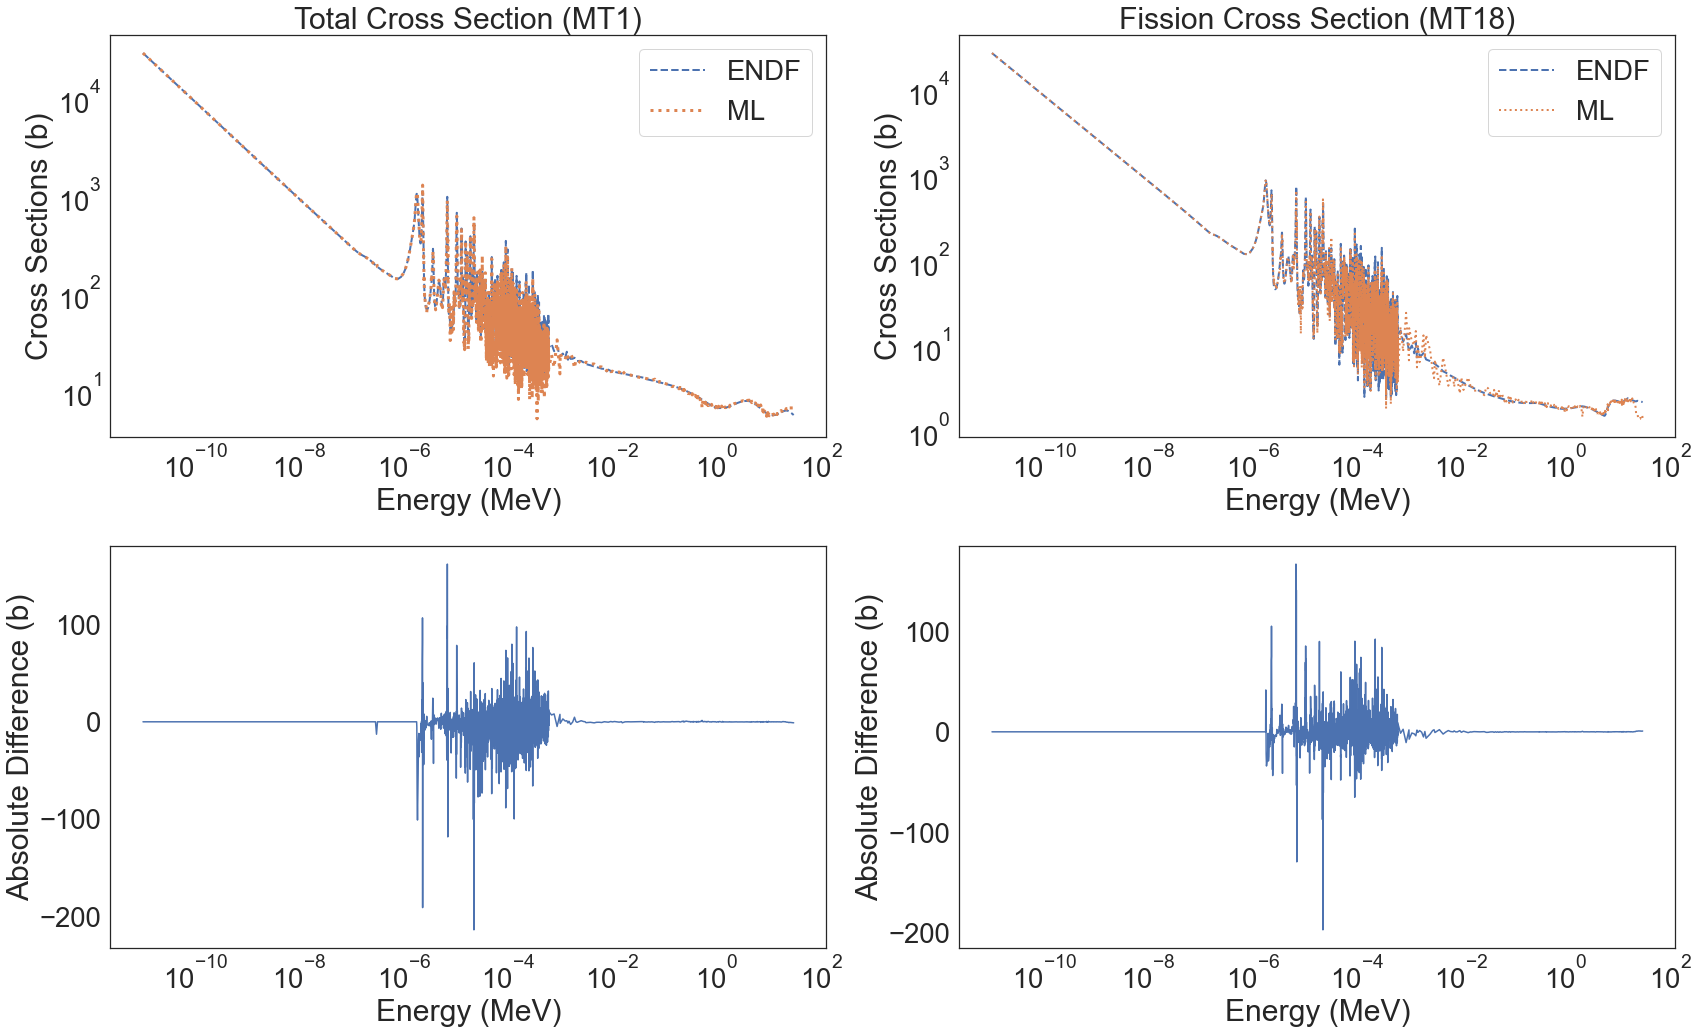

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(24,15))

axs[0, 0].loglog(energies, mt_data["MT_1"], linestyle='dashed', label='ENDF', linewidth=2)
axs[0, 0].loglog(u233_dt_test.Energy, Energy_Grid.MT_1, linestyle='dotted', label='ML', linewidth=3)
axs[0, 0].set_ylabel("Cross Sections (b)")
axs[0, 0].set_xlabel("Energy (MeV)")
axs[1, 0].plot(energies, diff_sig_1)
axs[1, 0].set_xscale('log')
axs[1, 0].set_ylabel('Absolute Difference (b)')
axs[1, 0].set_xlabel("Energy (MeV)")
axs[0, 0].set_title('Total Cross Section (MT1)')

# axs[0, 0].loglog(energies, Energy_Grid.MT_18, linestyle="dotted", linewidth=5, label="ML")
# axs[0, 0].loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
# axs[0, 0].set_title("MT 18")
axs[0, 0].legend()

axs[0, 1].loglog(mt18_info["energy"], mt18_info["xs"], linestyle='dashed', label='ENDF', linewidth=2)
axs[0, 1].loglog(u233_dt_test.Energy, Energy_Grid.MT_18, linestyle='dotted', label='ML', linewidth=2)
axs[0, 1].set_ylabel("Cross Sections (b)")
axs[0, 1].set_xlabel("Energy (MeV)")
axs[1, 1].plot(energies, diff_sig_18)
axs[1, 1].set_xscale('log')
axs[1, 1].set_ylabel('Absolute Difference (b)')
axs[1, 1].set_xlabel("Energy (MeV)")
axs[0, 1].set_title('Fission Cross Section (MT18)')
axs[0, 1].legend()


# axs[0, 2].loglog(mt102_info["energy"], mt102_info["xs"], linestyle='dashed', label='ENDF', linewidth=2)
# axs[0, 2].loglog(u233_dt_test.Energy, Energy_Grid.MT_102, linestyle='dotted', label='ML', linewidth=2)
# axs[0, 2].set_ylabel("Cross Sections (b)")
# axs[0, 2].set_xlabel("Energy (MeV)")
# axs[1, 2].plot(energies, diff_sig_102)
# axs[1, 2].set_xscale('log')
# axs[1, 2].set_ylabel('Absolute Difference (b)')
# axs[1, 2].set_xlabel("Energy (MeV)")
# axs[0, 2].set_title('Capture Cross Section (MT102)')
# axs[0, 2].legend()

fig.tight_layout(pad=1.0)
plt.savefig("figures/mc_winter_mt.png", dpi=600, bbox_tight=True)

C:\Users\Pedro\Anaconda3\envs\data_mining_gpu\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys


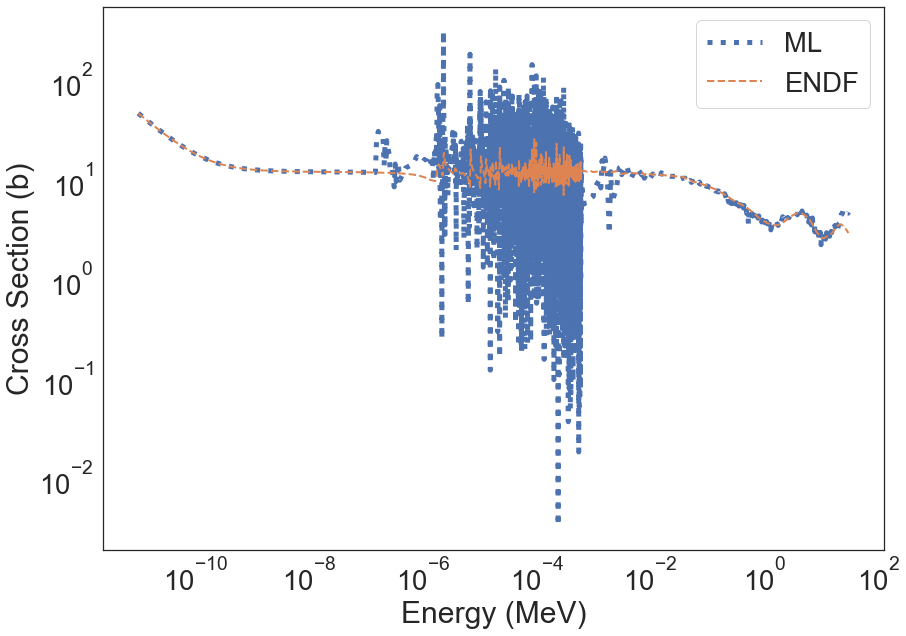

In [103]:
plt.figure(figsize=(14,10))
plt.loglog(energies, Energy_Grid.MT_2, linestyle="dotted", linewidth=5, label="ML")
plt.loglog(energies, mt_data["MT_2"], linestyle="dashed", linewidth=2, label="ENDF")
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Cross Section (b)')
plt.savefig("figures/MT_102_KNN_BEST.png", dpi=600, bbox_tight=True)

# Modify XSS

In [83]:
xss_mod = ace_utils.modify_xss_w_df(xss, Energy_Grid, mt_array, mt_xs_pointers_array, jxs, pointers)

INFO:root:139 Energy and 139 Cross Section Points Avaliable for MT16.
INFO:root:63 Energy and 63 Cross Section Points Avaliable for MT17.
INFO:root:8742 Energy and 8742 Cross Section Points Avaliable for MT18.
INFO:root:26 Energy and 26 Cross Section Points Avaliable for MT37.
INFO:root:364 Energy and 364 Cross Section Points Avaliable for MT51.
INFO:root:340 Energy and 340 Cross Section Points Avaliable for MT52.
INFO:root:329 Energy and 329 Cross Section Points Avaliable for MT53.
INFO:root:321 Energy and 321 Cross Section Points Avaliable for MT54.
INFO:root:315 Energy and 315 Cross Section Points Avaliable for MT55.
INFO:root:305 Energy and 305 Cross Section Points Avaliable for MT56.
INFO:root:301 Energy and 301 Cross Section Points Avaliable for MT57.
INFO:root:299 Energy and 299 Cross Section Points Avaliable for MT58.
INFO:root:296 Energy and 296 Cross Section Points Avaliable for MT59.
INFO:root:292 Energy and 292 Cross Section Points Avaliable for MT60.
INFO:root:289 Energy a

Text(0.04, 0.5, 'Cross Section (mb)')

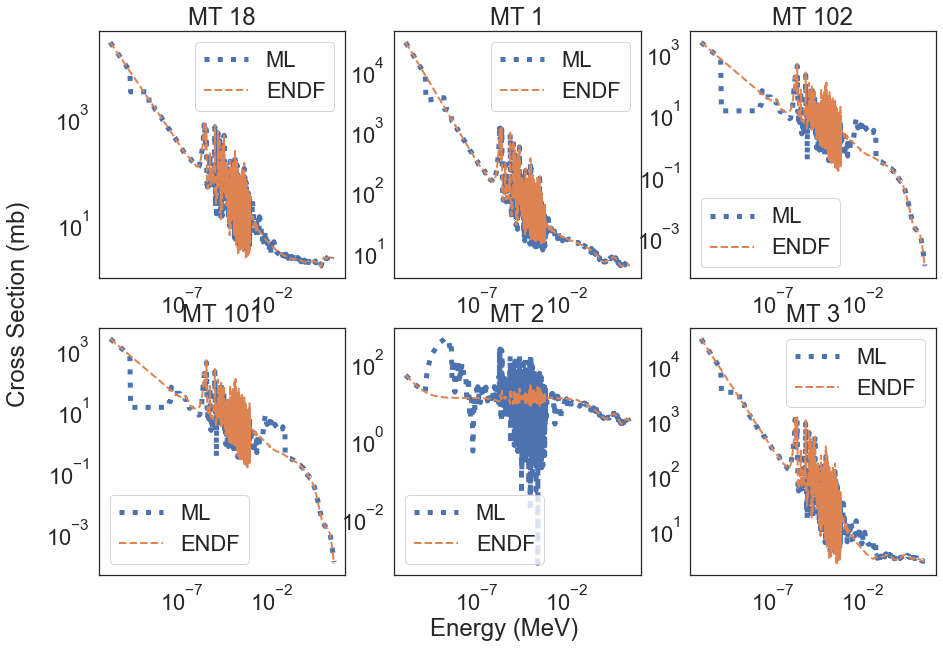

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
# fig.suptitle('ENDF vs ML Cross Sections for U-233')

axs[0, 0].loglog(energies, Energy_Grid.MT_18, linestyle="dotted", linewidth=5, label="ML")
axs[0, 0].loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 0].set_title("MT 18")
axs[0, 0].legend()

axs[0, 1].loglog(energies, Energy_Grid.MT_1, linestyle="dotted", linewidth=5, label="ML")
axs[0, 1].loglog(energies, mt1, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 1].set_title("MT 1")
axs[0, 1].legend()

axs[0, 2].loglog(energies, Energy_Grid.MT_102, linestyle="dotted", linewidth=5, label="ML")
axs[0, 2].loglog(energies, sig_102, linestyle="dashed", linewidth=2, label="ENDF")
axs[0, 2].set_title("MT 102")
axs[0, 2].legend()

axs[1, 0].loglog(energies, Energy_Grid.MT_101, linestyle="dotted", linewidth=5, label="ML")
axs[1, 0].loglog(energies, mt101, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 0].set_title("MT 101")
axs[1, 0].legend()

axs[1, 1].loglog(energies, Energy_Grid.MT_2, linestyle="dotted", linewidth=5, label="ML")
axs[1, 1].loglog(energies, mt2, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 1].set_title("MT 2")
axs[1, 1].legend()

axs[1, 2].loglog(energies, Energy_Grid.MT_3, linestyle="dotted", linewidth=5, label="ML")
axs[1, 2].loglog(energies, mt3, linestyle="dashed", linewidth=2, label="ENDF")
axs[1, 2].set_title("MT 3")
axs[1, 2].legend()


fig.text(0.5, 0.04, 'Energy (MeV)', ha='center')
fig.text(0.04, 0.5, 'Cross Section (mb)', va='center', rotation='vertical')

# Other Testing

In [23]:
# plt.figure(figsize=(14,10))
# plt.loglog(energies, Energy_Grid.MT_18, linestyle="dotted", linewidth=5, label="ML")
# plt.loglog(energies, sig_18, linestyle="dashed", linewidth=2, label="ENDF")
# plt.legend()

# plt.figure(figsize=(14,10))
# plt.loglog(energies, Energy_Grid.MT_1, linestyle="dotted", linewidth=5, label="ML")
# plt.loglog(energies, mt1, linestyle="dashed", linewidth=2, label="ENDF")
# plt.legend()

# plt.figure(figsize=(14,10))
# plt.loglog(energies, Energy_Grid.MT_102, linestyle="dotted", linewidth=5, label="ML")
# plt.loglog(energies, sig_102, linestyle="dashed", linewidth=2, label="ENDF")
# plt.legend()

# plt.figure(figsize=(14,10))
# plt.loglog(energies, Energy_Grid.MT_101, linestyle="dotted", linewidth=5, label="ML")
# plt.loglog(energies, mt101, linestyle="dashed", linewidth=2, label="ENDF")
# plt.legend()

# plt.figure(figsize=(14,10))
# plt.loglog(energies, Energy_Grid.MT_3, linestyle="dotted", linewidth=5, label="ML")
# plt.loglog(energies, mt3, linestyle="dashed", linewidth=2, label="ENDF")
# plt.legend()